In [5]:
import random
import matplotlib.pyplot as plt
import numpy as np
from row_processor import parse, process_post
import time

In [16]:
# Load all posts
input_file = "data/Posts.xml"

all_posts = []
parsed_posts = parse(input_file)
for attrs in parsed_posts:
    pid, shingles = process_post(attrs, k=5)
    if pid is not None and len(shingles) > 0:
        all_posts.append((pid, shingles))

print(f"Total posts loaded: {len(all_posts)}")

sample_size = 1000

if len(all_posts) >= sample_size:
    sampled_posts = random.sample(all_posts, sample_size)
else:
    sampled_posts = all_posts

# print first 5 sampled posts for verification
for i in range(min(5, len(sampled_posts))):
    print(f"Post ID: {sampled_posts[i][0]}, Shingles: {list(sampled_posts[i][1])[:10]}...")

Total posts loaded: 243104
Post ID: 400658, Shingles: ['practices quality right sounds like', 'time deployments drive refactoring want', 'value planning pms get credit', 'requirements drive good programming practices', 'nuanced requirements drive good programming', 'system zero time deployments drive', 'need requirements works template system', 'starts eg works pc nuanced', 'pc nuanced requirements drive good', 'planning pms get credit finishing']...
Post ID: 298584, Shingles: ['scsh splendid reasons one famous', 'reasons one famous acknowledgements text', 'produces regexps reasonably easy type', 'syntax still popular one explanations', 'popular one explanations think involve', 'allowing whitespace comments anything remotely', 'splendid reasons one famous acknowledgements', 'regexps originally designed used fly', 'attempt making readable allowing whitespace', 'regexps experience produces regexps reasonably']...
Post ID: 335104, Shingles: ['code add tell work supposed', 'simulated answe

In [19]:
def jaccard_similarity(set1, set2):
    set1 = set(set1)
    set2 = set(set2)
    
    if len(set1) == 0 and len(set2) == 0:
        return 1.0
    if len(set1) == 0 or len(set2) == 0:
        return 0.0
    
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    if intersection > 0:
        print(intersection/union)
        print(set1)
        print(set2)

    return intersection / union

similarities = []

for i in range(len(sampled_posts)):
    for j in range(i + 1, len(sampled_posts)):
        pid1, shingles1 = sampled_posts[i]
        pid2, shingles2 = sampled_posts[j]
        sim = jaccard_similarity(shingles1, shingles2)
        similarities.append(sim)

print(f"Calculated {len(similarities)} pairwise similarities.")

0.0025906735751295338
{'every software use comes python', 'reason others like lua ruby', 'en wikipedia org wiki list_of_python_software', 'made assume popular python become', 'python came top particular thing', 'came top particular thing matter', 'work film pretty much every', 'popular scripting language especially embedded', 'python scripting language http en', 'popular python become popular scripting', 'etc yet looks like python', 'ruby etc yet looks like', 'thing matter getting right time', 'looked field work film pretty', 'lua ruby etc yet looks', 'wiki list_of_python_software made assume popular', 'wikipedia org wiki list_of_python_software made', 'others like lua ruby etc', 'list_of_python_software made assume popular python', 'python become popular scripting language', 'org wiki list_of_python_software made assume', 'scripting language http en wikipedia', 'scripting language especially embedded language', 'yet looks like python came', 'comes python scripting language http', 'pre

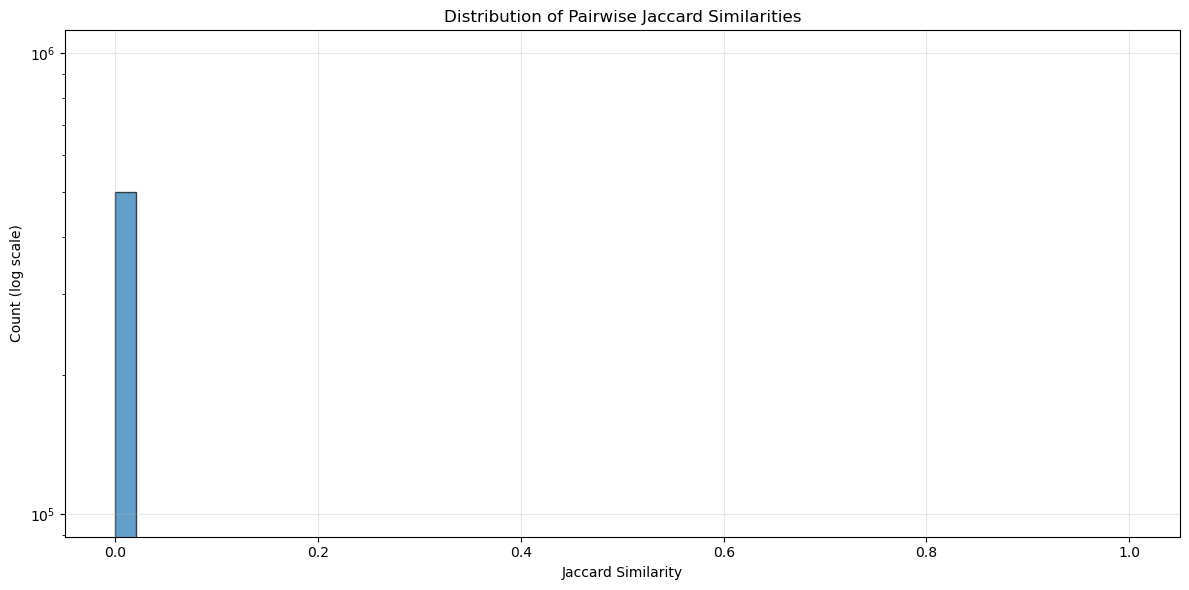

Mean similarity: 0.0000
Median similarity: 0.0000
Max similarity: 0.0133
Min similarity: 0.0000


In [20]:
bin_size = 0.02
bins = np.arange(0, 1 + bin_size, bin_size)

plt.figure(figsize=(12, 6))
plt.hist(similarities, bins=bins, edgecolor='black', alpha=0.7)
plt.yscale('log')
plt.xlabel('Jaccard Similarity')
plt.ylabel('Count (log scale)')
plt.title('Distribution of Pairwise Jaccard Similarities')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Mean similarity: {np.mean(similarities):.4f}")
print(f"Median similarity: {np.median(similarities):.4f}")
print(f"Max similarity: {np.max(similarities):.4f}")
print(f"Min similarity: {np.min(similarities):.4f}")